English
OV : 0.0477 VO : 0.9523
French
OV : 0.346 VO : 0.654
Japanese
OV : 0.9158 VO : 0.0842
Marathi
OV : 0.9069 VO : 0.0931
Sanskrit
OV : 0.7746 VO : 0.2254
Italian
OV : 0.1977 VO : 0.8023
German
OV : 0.4938 VO : 0.5062
Polish
OV : 0.2809 VO : 0.7191
Russian
OV : 0.194 VO : 0.806
Spanish
OV : 0.1689 VO : 0.8311


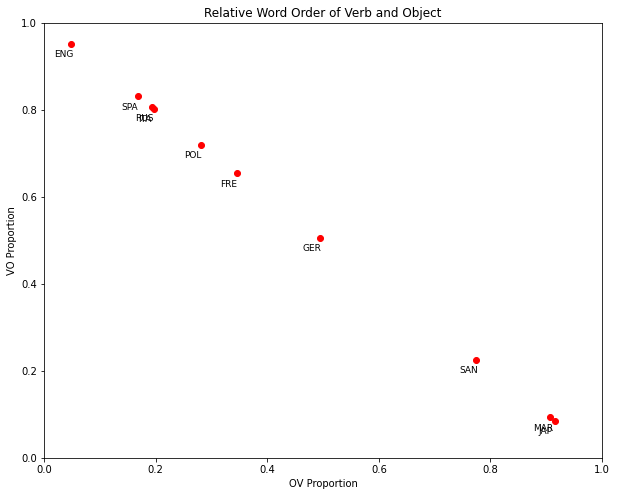

In [6]:
import matplotlib.pyplot as plt

treebanks = ['en_atis-ud-train.conllu','fr_fqb-ud-test.conllu','ja_pud-ud-test.conllu',
             'mr_ufal-ud-train.conllu','sa_vedic-ud-train.conllu','it_isdt-ud-train.conllu',
             'de_gsd-ud-train.conllu','pl_lfg-ud-train.conllu','ru_gsd-ud-train.conllu',
             'es_gsd-ud-train.conllu']
languages = ['English', 'French', 'Japanese', 'Marathi', 'Sanskrit',
             'Italian', 'German', 'Polish', 'Russian', 'Spanish']
labels = ['ENG', 'FRE', 'JAP', 'MAR', 'SAN', 'ITA', 'GER', 'POL', 'RUS', 'SPA']

prop_ov = []
prop_vo = []
i = 0

for file in treebanks:
    udt = open(file, 'r', encoding = 'utf-8')
    vo = 0
    ov = 0
    for val in udt.readlines():
        line = val.split('\t')
        if 'obj' in line:
            if line[6] > line[0]:
                ov = ov + 1
            else:
                vo = vo + 1
    
    if ov < vo:
        ov = ov/(ov+vo)
        vo = 1 - ov
    else:
        vo = vo/(vo+ov)
        ov = 1 - vo
    
    prop_ov.append(ov)
    prop_vo.append(vo)
    
    print(languages[i] + '\nOV : ' + str(round(ov,4)) + ' VO : ' + str(round(vo,4)))
    i=i+1

plt.figure(figsize=(10, 8))
plt.plot(prop_ov, prop_vo, 'ro')
plt.title('Relative Word Order of Verb and Object')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('OV Proportion')
plt.ylabel('VO Proportion')
for i in range(len(labels)):
    plt.text(prop_ov[i]-0.03, prop_vo[i]-0.03, labels[i], fontsize=9)

plt.show()
    